<a href="https://colab.research.google.com/github/HammadN98/pytorch/blob/main/Train_Test_Loop_RegressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
torch.__version__

'2.3.0+cu121'

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Dispositivo Utilizadop: {device}")

Dispositivo Utilizadop: cpu


In [4]:
def cria_dados(weight, bias, start, end, step):
  X = torch.arange(start, end, step).unsqueeze(dim=1)
  y = weight * X + bias
  return X, y


In [5]:
X, y = cria_dados(0.7, 0.3, 0, 1, 0.02)

In [6]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [7]:
def separa_dados(pct_treino: float):
  train_split = int(pct_treino * len(X))
  X_train, y_train = X[:train_split], y[:train_split]
  X_test, y_test = X[train_split:], y[train_split:]
  return  X_train, y_train, X_test, y_test


In [8]:
X_train, y_train, X_test, y_test = separa_dados(0.8)
len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [9]:
#FUncao adaptada do professor, ja que nao eh bem o intuido do notebook fazer funcao de algo que ja eh funcao
def plota_predicoes(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  """ Objetido da funcao eh plotar os dados de treno, teste, e se passado as predicoes para acompanhamento da aprendizagem do modelo."""
  plt.figure(figsize=(7,5)) #Tamanho da figura

  #Plotando os pontos dos dados de Treino
  plt.scatter(train_data, train_labels, c='b', s=3, label='Treino')

  #Plotando os pontos dos dados de Teste
  plt.scatter(test_data, test_labels, c='g', s=3, label='Teste')

  #Plotando os pontos dos dados da Predicao, se houver
  if predictions is not None:
    plt.scatter(X_test, predictions, c='r', s=4, label='Predicoes')

  #Legenda
  plt.legend(prop={"size": 10})

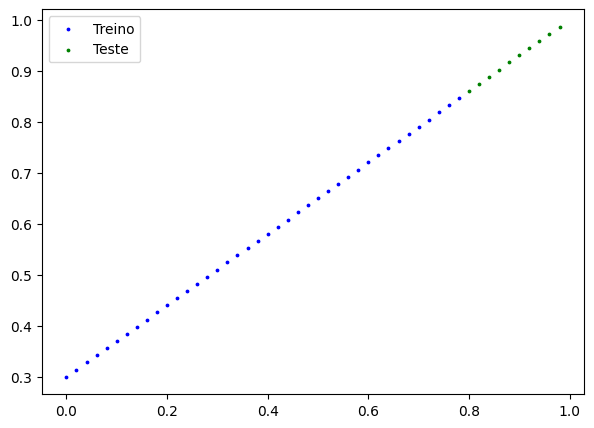

In [10]:
plota_predicoes()

In [21]:
#Criando omodelo de Regressao Linear
class RegressaoLinear(nn.Module): #Herda de  nn.Module
  def __init__(self): # Inicializador da classe
    super().__init__() #Chama o metodo inicializador da classe pai,  nn.Module, para que a  classe possa herdar as funcionalidades e propriedades dos modulos Pytorch
    #nn.Linear() para criar os parametros do modelo
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)
                                    # -> indica que a saida da funcao eh um Tensor
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
modelo_1 = RegressaoLinear()

modelo_1, modelo_1.state_dict()

(RegressaoLinear(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [28]:
# Treino
def treino(epoch: int, X_train, y_train, X_test, y_test):
  torch.manual_seed(42)

  #Caso algum dados nao esteja no mesmo dispositivo dara erro, colocando todos no mesmo
  X_train = X_train.to(device)
  y_train = y_train.to(device)
  X_test = X_test.to(device)
  y_test = y_test.to(device)

  # Funcao da perda/ loss function
  loss_fn = nn.L1Loss() #MAE

  #Otimizador
  optimizer = torch.optim.SGD(params=modelo_1.parameters(),
                              lr=0.01)

  #Loop de Treino e Teste com base nas "epoch"
  for epoch in range(epoch):
    modelo_1.train() #Ativa as funcoes/parametros que sao necessarias para o treinamento

    # 1. Metodo Forward
    y_pred = modelo_1(X_train)

    # 2. loss
    loss = loss_fn(y_pred, y_train) #COmprando as predicoes com os dados de treino

    # 3. Optimizer zero gradd
    optimizer.zero_grad() #Zerando o gradinete acumulado

    # 4. Backpropagation
    loss.backward()

    # 5. Optimizer Step
    optimizer.step()

    #TEste
    modelo_1.eval() #Desligar coisas que nao necessitamos paara testar
    with torch.inference_mode():
      teste_pred = modelo_1(X_test)

      test_loss = loss_fn(teste_pred, y_test)

    if epoch % 20 == 0:
      print(f"Epoch {epoch} | Loss: {loss} | Test Loss: {test_loss}")

  return teste_pred


In [29]:
teste_pred = treino(200, X_train, y_train, X_test, y_test)

Epoch 0 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch 20 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch 40 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch 60 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch 80 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch 100 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch 140 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch 160 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch 180 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904


In [30]:
modelo_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

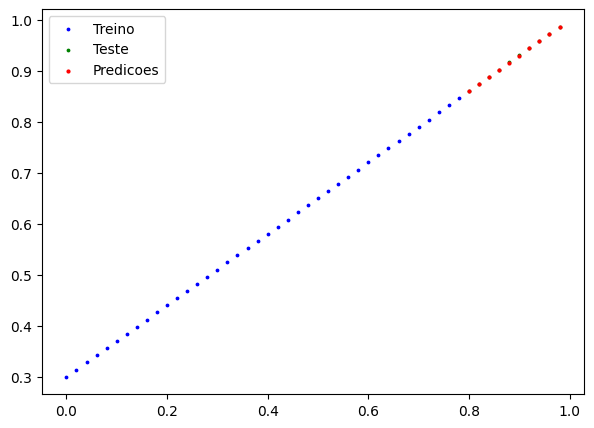

In [31]:
plota_predicoes(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=teste_pred)

In [34]:

def salva_modelo(pasta, nome):
  # cirnado a pasta
  MODEL_PATH = Path(pasta)
  MODEL_PATH.mkdir(parents=True, exist_ok=True)

  #Criando caminho para salvar
  MODEL_NAME = nome
  MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

  # 3 Salvando o "state dict" do modelo
  print(f"Salvando o modelo com funcao em: {MODEL_SAVE_PATH}")
  torch.save(obj=modelo_1.state_dict(),
             f=MODEL_SAVE_PATH)

  return MODEL_SAVE_PATH

In [35]:
SALVO = salva_modelo('modelos', '01_modelo_funcao')

Salvando o modelo com funcao em: modelos/01_modelo_funcao


In [54]:
def carrega_modelo(caminho_salvo):

  #Criando uma nova instancia do Modelo v2 de Regressao Linear
  carregado = RegressaoLinear()  #O modelo deve existir no codigo assim, para assim ser instanciado. Afinal o que foi salvo e aberto agora eh apenas o estado do dicionario de aprendizado do modelo, e nao o modelo em si.

  #Carregando o "state_dict" do modelo salvo [Aqui nao carregamos o modelo, apenas o estado de aprendizado dele]
  carregado.load_state_dict(torch.load(caminho_salvo))

  # Mudando o modelo para device (no meu caso deve seguir um cpu ja que a GPU nao esta nativamente abilitada)
  carregado.to(device)

  return carregado #Retorna o modelo carregado


In [55]:
salvo= carrega_modelo(SALVO)

In [56]:
salvo.eval()
with torch.inference_mode():
  salvo_pred = salvo(X_test)
teste_pred == salvo_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

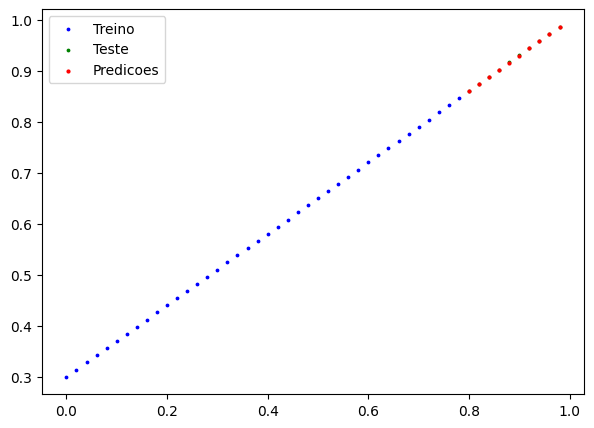

In [57]:
#Plotando as predicoes do modelo salvo e carrgado
plota_predicoes(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=salvo_pred) #[predictions=test_pred.cpu()] caso esteja em cuda ja que a funcao pra plot dos graficos foi feito com numpy.

## END